In [1]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse

import rtmtools.clirad.sw.wrangle as cliradwrangle

import rtmtools.rrtmg.sw.wrangle as rrtmgwrangle

import climatools.offline_scripts.intermodel as scripts_intermodel



importlib.reload(aerutils)

importlib.reload(aeranalyse)

importlib.reload(cliradwrangle)

importlib.reload(rrtmgwrangle)

importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = 'O3' #r'$H_{2}O$'

In [3]:
# Load CRD results

# CRD H2008
#pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
#                           'radiation/crd/SW/examples',
#                           'mls75_H2O_new/OUTPUT_CRD.dat')
#pnl_crd = aerutils\
#.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
#                              signed_fluxes=True)

path_crd = os.path.join('/nuwa_cluster/home/jackyu',
                        'radiation/crd/SW/examples',
                        'mls75_{name_molecule}'\
                        .format(name_molecule=name_molecule),
                        'OUTPUT_CRD.dat')
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=path_crd, 
                                                signed_fluxes=True)

In [4]:
## CRD H2012
#pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
#                           'radiation/crd/SW/examples',
#                           'mls75_{name_molecule}_solzen_60_H2012'\
#                           .format(name_molecule=name_molecule),
#                           'OUTPUT_CRD.dat')
#pnl_crd_H2012 = aerutils\
#.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
#                              signed_fluxes=True)

In [5]:
# Load CLIRAD results
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/SW/examples',
                              'mls75_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')
pnl_clirad = cliradwrangle\
.OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad, 
                              signed_fluxes=True)

In [6]:
# Load AER RRTMG's results
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/SW/examples',
                             'mls_71lvls_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')
pnl_rrtmg = rrtmgwrangle\
.OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg, 
                            signed_fluxes=True)

# 'Total' heating rates

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  629.330785  629.330785      0.000000
30   299.800000        0  619.904035  619.904035      0.027433
0   1013.000000        0  618.932713  618.932713      0.006447

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242  -0.0002   592.7475  592.7473       0.00000
30   299.70000   0.0000   584.0589  584.0589       0.02581
0   1013.00000   0.0000   583.1602  583.1602       0.00596

CLIRAD
       pressure   flux_up   flux_down    net_flux  heating_rate
70     0.002417 -0.000254  684.070837  684.070583      3.334157
30   299.800000 -0.000109  660.909569  660.909460      0.016499
0   1013.000000  0.000000  660.198716  660.198716      0.007060

CRD - RRTMG
    pressure  flux_up  flux_down   net_flux  heating_rate
70 -0.000003   0.0002  36.583285  36.583485      0.000000
30  0.100000   0.0000  35.845135  35.845135      0.001623
0   0.000000   0.0000  35.772513  35.772513      0

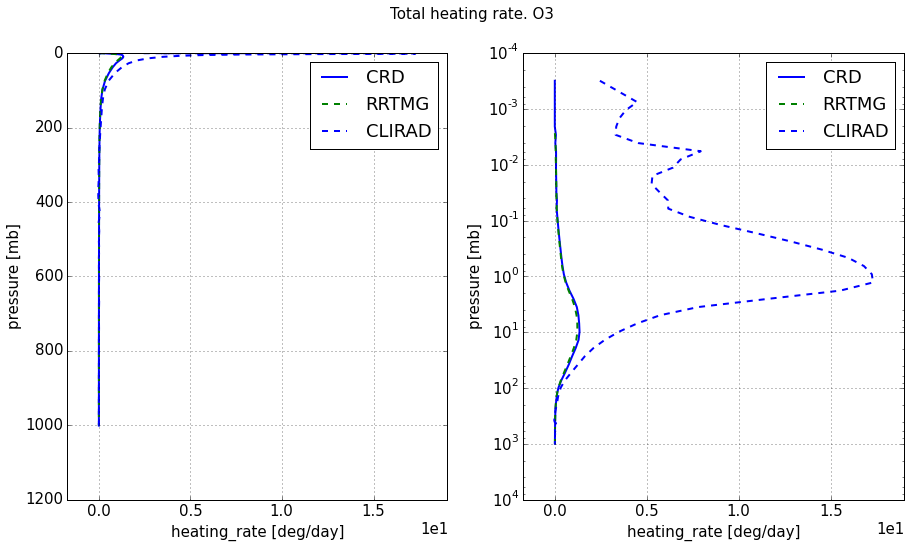

In [7]:
scripts_intermodel.sw_results_all_wavenumbers(
    infos_wavenumber = [('CRD', 'b', '-', pnl_crd),
                        ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband = [('CLIRAD', 'b', '--', pnl_clirad)],
    name_molecule=name_molecule)

In [8]:
html_download = ('<a href="./shortwave_mls_{name_molecule}_total.xlsx"'
                 'download>shortwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In selected spectral bands

In [ ]:
# By arbitrary bands

def define_spectral_bands():
    return [(1000, 4400),
           (4400, 8200),
           (8200, 14280),
           (14280, 25000),
           (1000, 25000)]


def fluxtableNhrplot_by_bands(bands, *infos_lbl):
    global name_molecule, xlim_linear
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = map(list, zip(*infos_lbl))
          
    pnls = [aeranalyse.lines2bands(pnl_lbl, wbands = bands)\
            for pnl_lbl in pnls_lbl]
    
    
    for item in bands:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[item].loc[atm_levels, :] for pnl in pnls]
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'Wavenumber band: {} ~ {} cm-1'.format(*item))      
        
        dfs = [pnl[item] for pnl in pnls]
        
        max_cr = max([df['heating_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Heating rate {} {} ~ {} cm-1'.format(name_molecule, *item),
                              cooling_rate = False,
                              xlim_linear = None,
                              xlim_log = None)
    
        display.display(plt.gcf()); plt.close()

In [110]:
print('Flux tables and heating rates in various spectral bands')
print()
print()

#fluxtableNhrplot_by_bands(define_spectral_bands(), \
#                         ('CRD', 'b', '-', pnl_crd),
#                         ('CRD H2012', 'y', '--', pnl_crd_H2012))

Flux tables and heating rates in various spectral bands




# In RRMTG's wavenumber bands

Flux tables and heating rates in RRTMG spectral bands


RRTMG-SW spectral band. Band 1. 2600.0 ~ 3250.0 cm-1.

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242       -0   6.046375  6.046375             0
30   299.70000       -0   6.046375  6.046375             0
0   1013.00000       -0   6.046375  6.046375             0

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   6.046375  6.046375      0.000000
30   299.800000        0   6.031084  6.031084      0.000045
0   1013.000000        0   6.029468  6.029468      0.000011

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.015292  0.015292     -0.000045
0   0.000000       -0   0.016908  0.016908     -0.000011



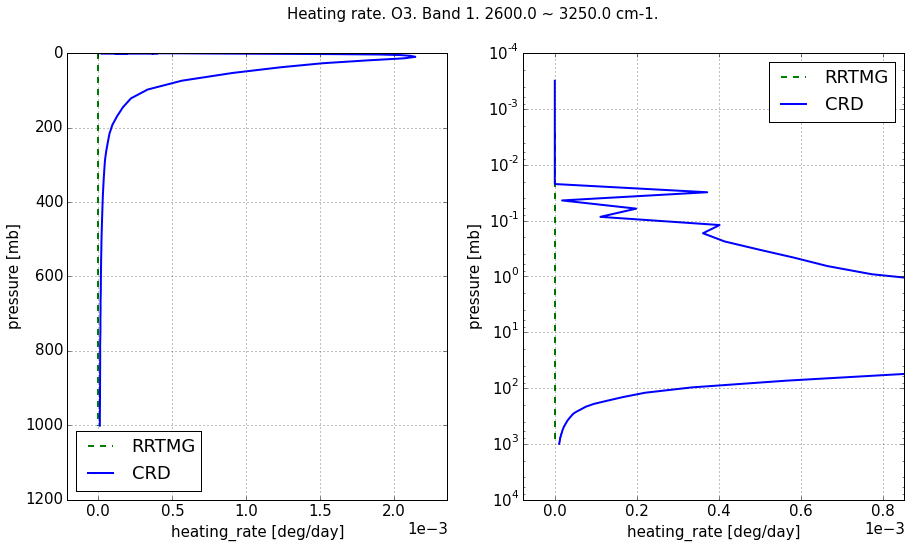


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 2. 3250.0 ~ 4000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  10.192627  10.192627             0
30   299.70000       -0  10.192627  10.192627             0
0   1013.00000       -0  10.192627  10.192627             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  10.192627  10.192627      0.000000
30   299.800000        0  10.167071  10.167071      0.000076
0   1013.000000        0  10.164371  10.164371      0.000018

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.025556  0.025556     -0.000076
0   0.000000       -0   0.028256  0.028256     -0.000018



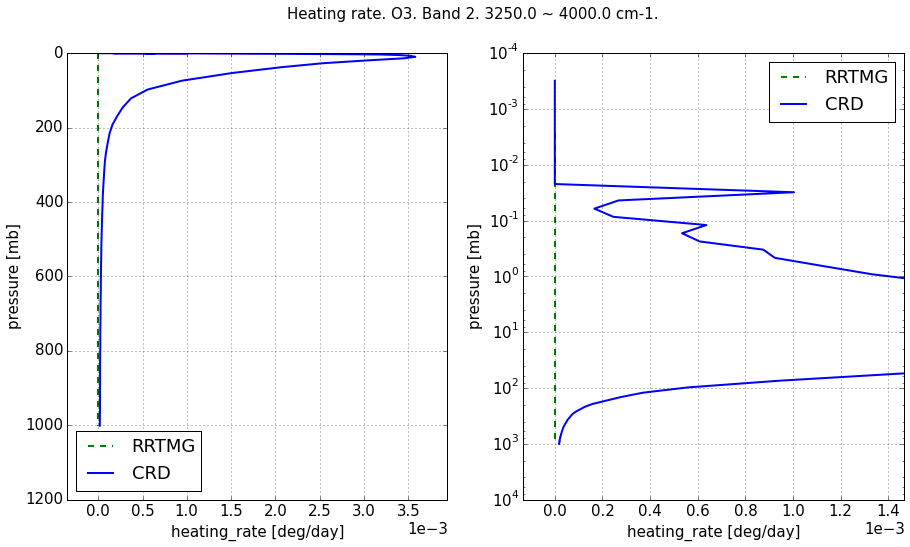


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 3. 4000.0 ~ 4650.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  11.837001  11.837001             0
30   299.70000       -0  11.837001  11.837001             0
0   1013.00000       -0  11.837001  11.837001             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  11.837001  11.837001      0.000000
30   299.800000        0  11.807579  11.807579      0.000087
0   1013.000000        0  11.804470  11.804470      0.000021

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.029423  0.029423     -0.000087
0   0.000000       -0   0.032531  0.032531     -0.000021



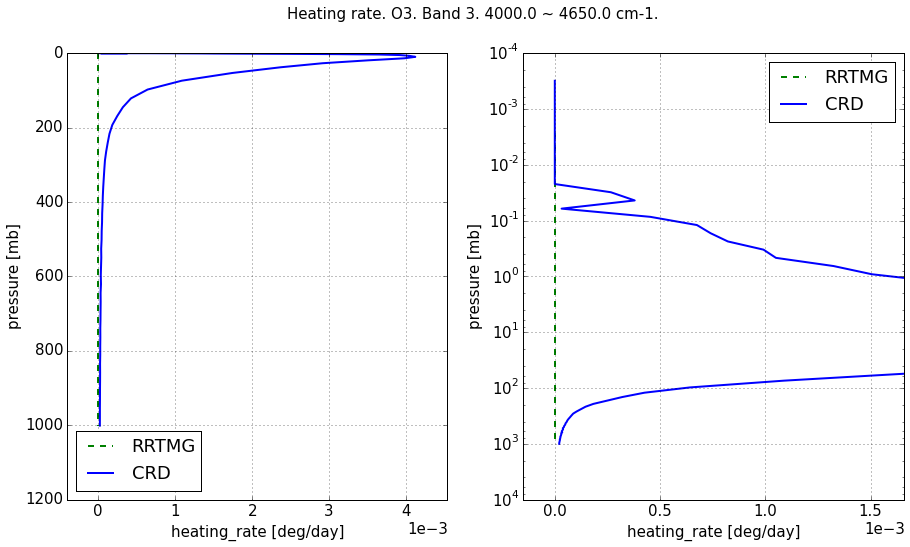


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 4. 4650.0 ~ 5150.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  11.175499  11.175499             0
30   299.70000       -0  11.175499  11.175499             0
0   1013.00000       -0  11.175499  11.175499             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  11.175499  11.175499      0.000000
30   299.800000        0  11.147923  11.147923      0.000081
0   1013.000000        0  11.145007  11.145007      0.000020

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.027576  0.027576     -0.000081
0   0.000000       -0   0.030492  0.030492     -0.000020



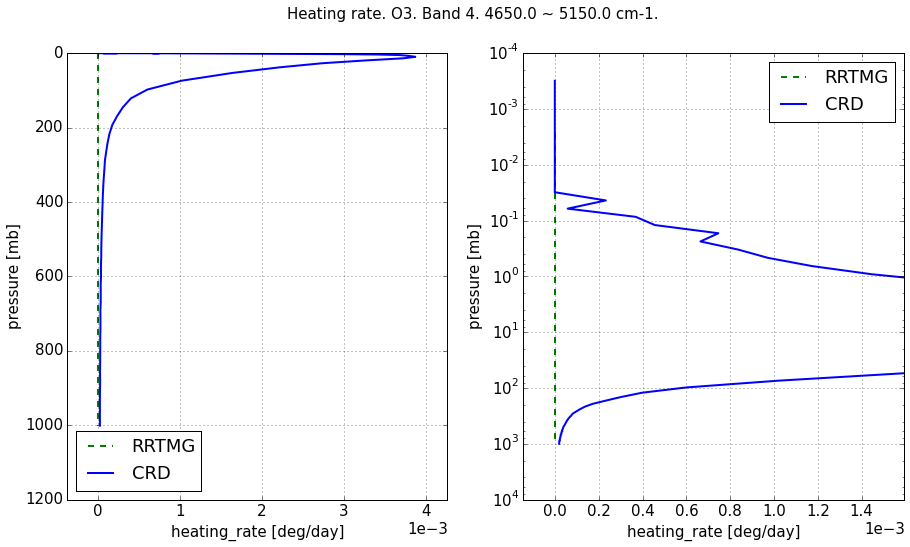


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 5. 5150.0 ~ 6150.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  28.035879  28.035879             0
30   299.70000       -0  28.035879  28.035879             0
0   1013.00000       -0  28.035879  28.035879             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  28.035879  28.035879      0.000000
30   299.800000        0  27.967359  27.967359      0.000202
0   1013.000000        0  27.960120  27.960120      0.000049

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0    0.00000   0.00000      0.000000
30 -0.100000       -0    0.06852   0.06852     -0.000202
0   0.000000       -0    0.07576   0.07576     -0.000049



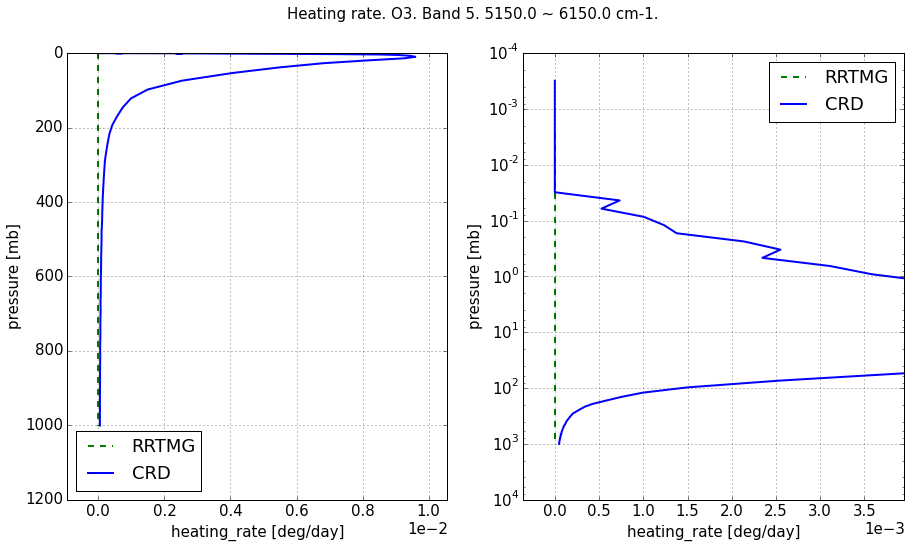


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 6. 6150.0 ~ 7700.0 cm-1.

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242       -0   51.85563  51.85563             0
30   299.70000       -0   51.85563  51.85563             0
0   1013.00000       -0   51.85563  51.85563             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  51.855630  51.855630      0.000000
30   299.800000        0  51.730954  51.730954      0.000374
0   1013.000000        0  51.717790  51.717790      0.000086

RRTMG - CRD
    pressure  flux_up     flux_down      net_flux  heating_rate
70  0.000003       -0  7.105427e-15  7.105427e-15      0.000000
30 -0.100000       -0  1.246760e-01  1.246760e-01     -0.000374
0   0.000000       -0  1.378402e-01  1.378402e-01     -0.000086



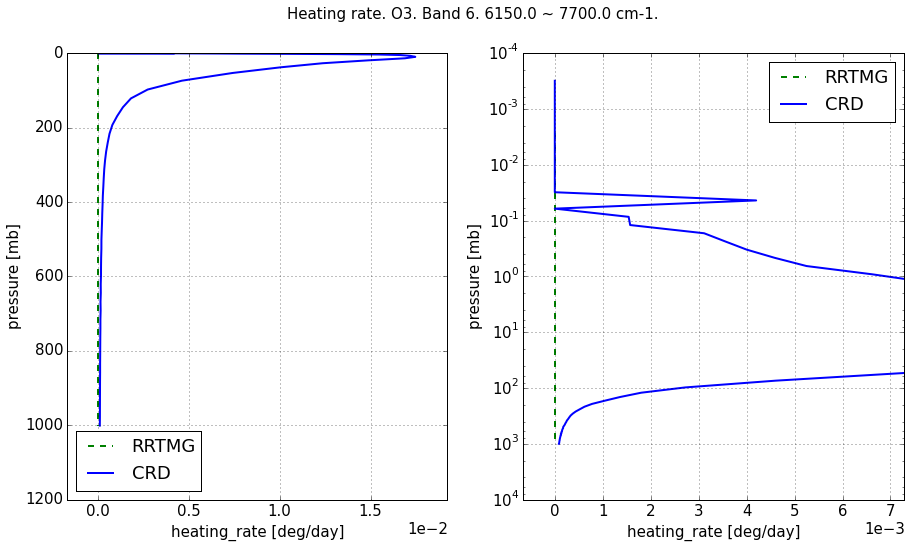


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 7. 7700.0 ~ 8050.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  12.480128  12.480128             0
30   299.70000       -0  12.480128  12.480128             0
0   1013.00000       -0  12.480128  12.480128             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  12.480128  12.480128      0.000000
30   299.800000        0  12.450489  12.450489      0.000087
0   1013.000000        0  12.447355  12.447355      0.000022

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.029639  0.029639     -0.000087
0   0.000000       -0   0.032773  0.032773     -0.000022



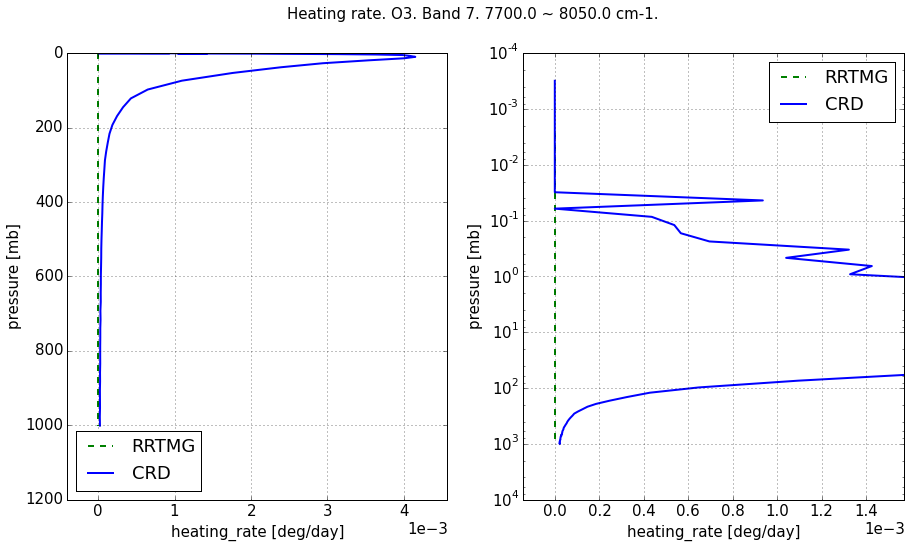


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 8. 8050.0 ~ 12850.0 cm-1.

RRTMG
      pressure  flux_up   flux_down    net_flux  heating_rate
70     0.00242       -0  175.812142  175.812142             0
30   299.70000       -0  175.812142  175.812142             0
0   1013.00000       -0  175.812142  175.812142             0

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  175.812142  175.812142      0.000000
30   299.800000        0  175.386253  175.386253      0.001271
0   1013.000000        0  175.341259  175.341259      0.000305

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.425889  0.425889     -0.001271
0   0.000000       -0   0.470883  0.470883     -0.000305



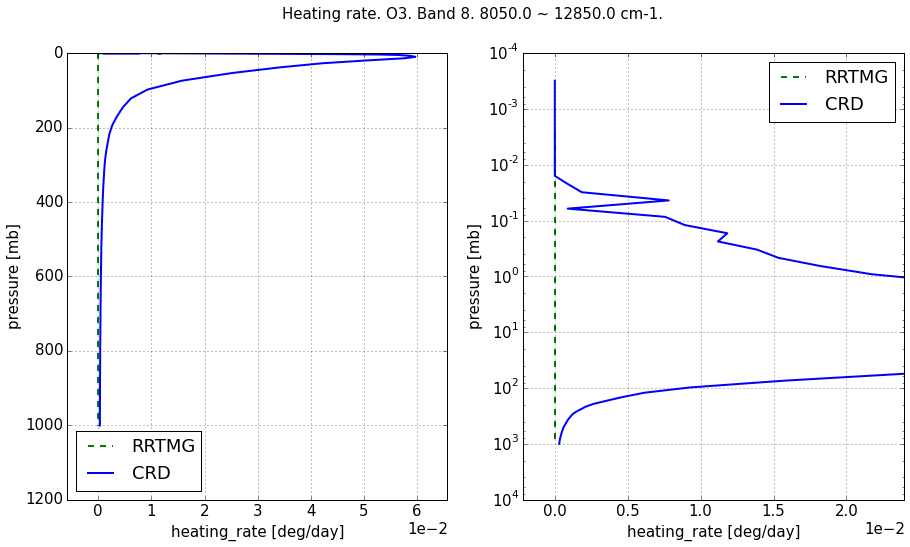


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 9. 12850.0 ~ 16000.0 cm-1.

RRTMG
      pressure  flux_up   flux_down    net_flux  heating_rate
70     0.00242  -0.0001  108.653756  108.653656       0.00000
30   299.70000  -0.0000  106.377170  106.377170       0.00700
0   1013.00000  -0.0000  106.134253  106.134253       0.00162

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  108.653756  108.653756      0.000000
30   299.800000        0  106.413398  106.413398      0.006565
0   1013.000000        0  106.180816  106.180816      0.001543

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003  -0.0001   0.000000 -0.000100      0.000000
30 -0.100000  -0.0000  -0.036228 -0.036228      0.000435
0   0.000000  -0.0000  -0.046563 -0.046563      0.000077



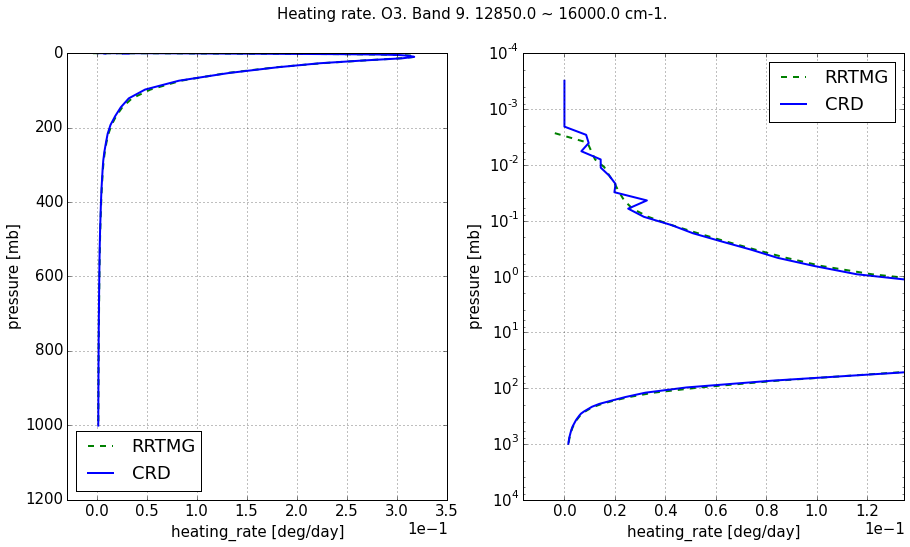


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 10. 16000.0 ~ 22650.0 cm-1.

RRTMG
      pressure   flux_up   flux_down    net_flux  heating_rate
70     0.00242 -0.000099  171.966629  171.966530       0.00000
30   299.70000 -0.000000  165.623933  165.623933       0.01881
0   1013.00000 -0.000000  164.975280  164.975280       0.00434

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  171.966629  171.966629      0.000000
30   299.800000        0  165.570541  165.570541      0.018516
0   1013.000000        0  164.915302  164.915302      0.004343

RRTMG - CRD
    pressure   flux_up  flux_down  net_flux  heating_rate
70  0.000003 -0.000099   0.000000 -0.000099      0.000000
30 -0.100000 -0.000000   0.053392  0.053392      0.000294
0   0.000000 -0.000000   0.059978  0.059978     -0.000003



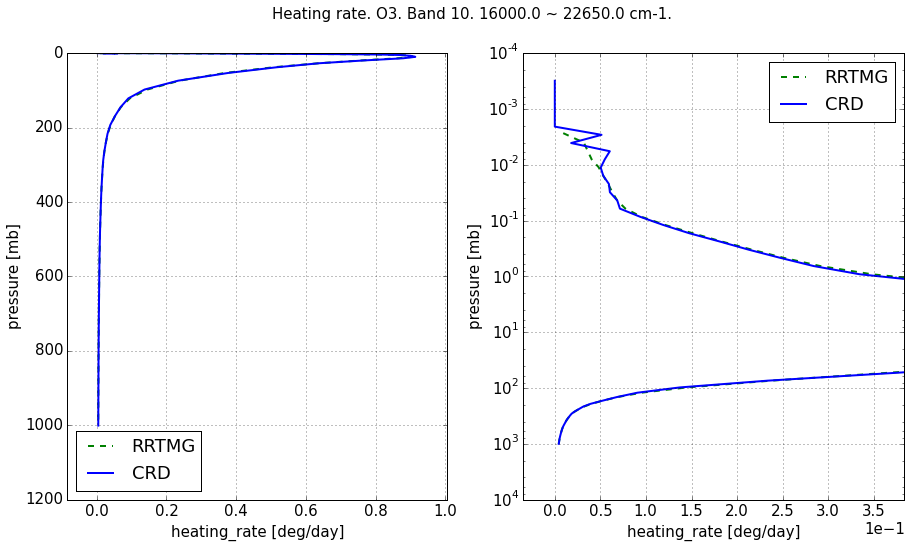


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 11. 22650.0 ~ 29000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  63.770652  63.770652             0
30   299.70000       -0  63.770652  63.770652             0
0   1013.00000       -0  63.770652  63.770652             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  63.770652  63.770652      0.000000
30   299.800000        0  63.734009  63.734009      0.000106
0   1013.000000        0  63.730119  63.730119      0.000026

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.036643  0.036643     -0.000106
0   0.000000       -0   0.040533  0.040533     -0.000026



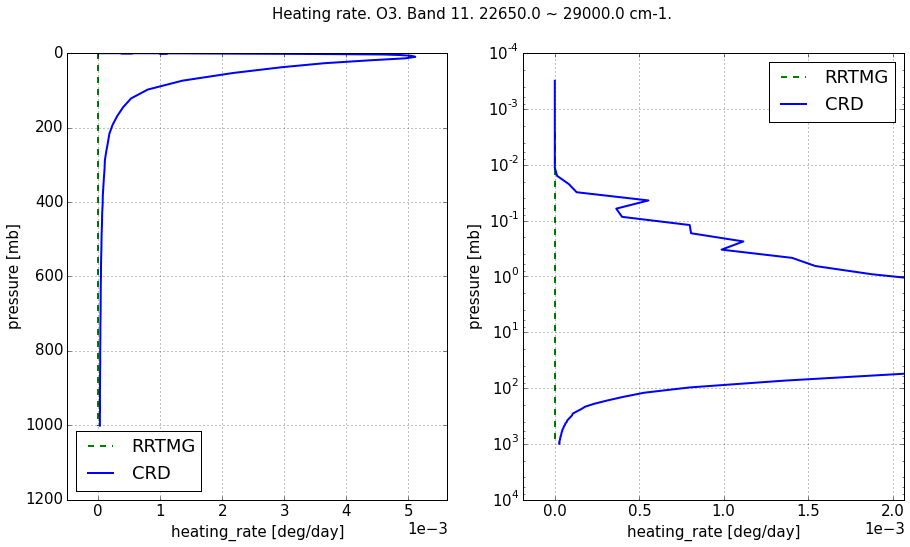


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 12. 29000.0 ~ 38000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  23.027642  23.027642       0.00000
30   299.70000       -0  11.288881  11.288881       0.00884
0   1013.00000       -0  10.996491  10.996491       0.00221

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  23.027642  23.027642      1.379737
30   299.800000        0  12.086737  12.086737      0.007191
0   1013.000000        0  11.844013  11.844013      0.001541

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -1.379737
30 -0.100000       -0  -0.797856 -0.797856      0.001649
0   0.000000       -0  -0.847522 -0.847522      0.000669



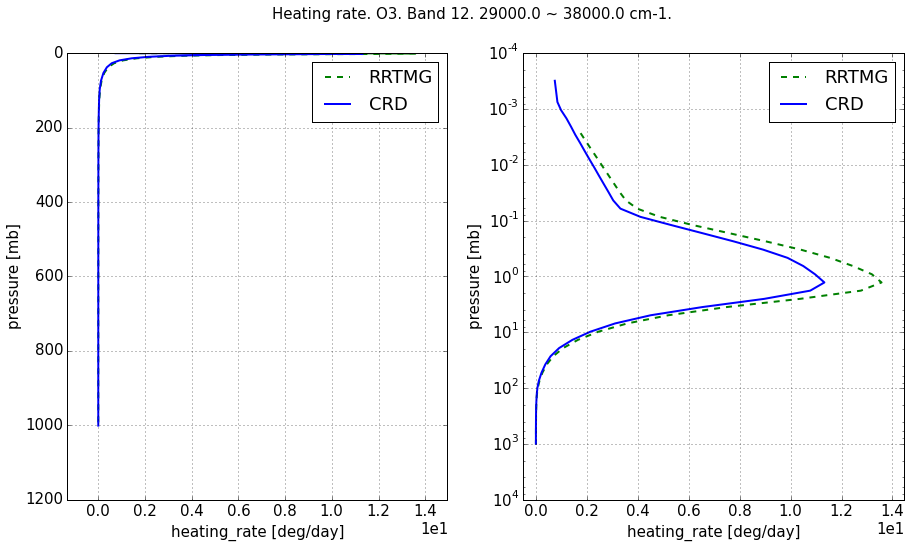


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 13. 38000.0 ~ 50000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242       -0   1.544355  1.544355             0
30   299.70000       -0   0.000201  0.000201             0
0   1013.00000       -0   0.000100  0.000100             0

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   1.544355  1.544355  8.168243e-01
30   299.800000        0   0.000160  0.000160  2.647094e-06
0   1013.000000        0   0.000090  0.000090  3.423915e-07

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000 -8.168243e-01
30 -0.100000       -0   0.000041  0.000041 -2.647094e-06
0   0.000000       -0   0.000010  0.000010 -3.423915e-07



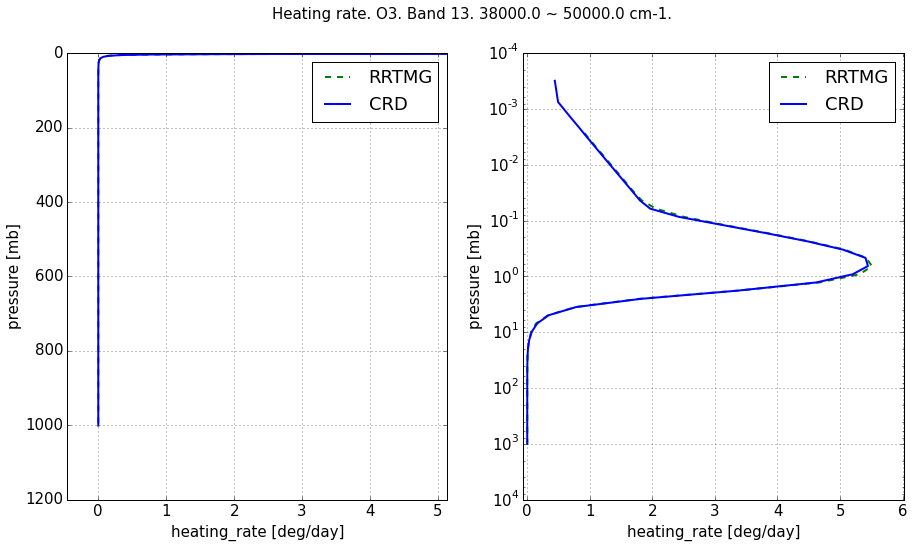


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 14. 820.0 ~ 2600.0 cm-1.

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242       -0    6.19075   6.19075             0
30   299.70000       -0    6.19075   6.19075             0
0   1013.00000       -0    6.19075   6.19075             0

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   6.190750  6.190750      0.000000
30   299.800000        0   6.174913  6.174913      0.000047
0   1013.000000        0   6.173239  6.173239      0.000011

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000      0.000000
30 -0.100000       -0   0.015837  0.015837     -0.000047
0   0.000000       -0   0.017511  0.017511     -0.000011



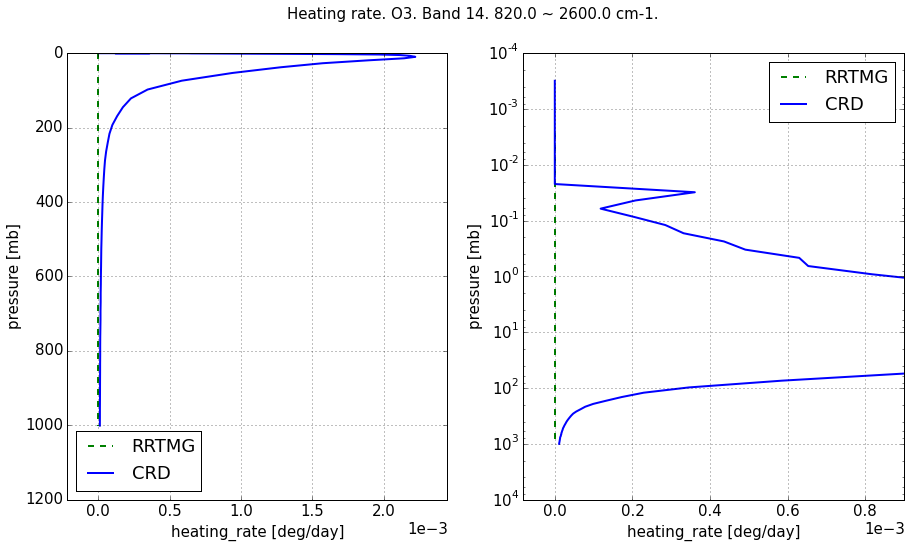


------------------------------------------------------------------------



In [9]:
print('Flux tables and heating rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.sw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),],
    name_molecule=name_molecule) 

In [10]:
html_download = ('<a href='
                 '"./shortwave_mls_{name_molecule}_by_rrtmg_bands.xlsx"'
                 'download>'
                 'shortwave_mls_{name_molecule}_by_rrtmg_bands.xlsx'
                 '</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and heating rates in CLIRAD spectral bands


CLIRAD-SW spectral. Band 1. 35088 ~ 44444 cm-1

CLIRAD
       pressure       flux_up  flux_down  net_flux  heating_rate
70     0.002417 -9.503125e-09   3.514132  3.514132      2.038069
30   299.800000 -1.775392e-53  -1.403770 -1.403770     -0.019602
0   1013.000000 -0.000000e+00  -0.862793 -0.862793     -0.001223

CRD
       pressure  flux_up     flux_down      net_flux  heating_rate
70     0.002417        0  3.514199e+00  3.514199e+00  1.840741e+00
30   299.800000        0  2.411620e-19  2.411620e-19  3.447644e-20
0   1013.000000        0  3.409472e-21  3.409472e-21  1.002798e-22

CLIRAD - CRD
    pressure       flux_up  flux_down  net_flux  heating_rate
70         0 -9.503125e-09  -0.000067 -0.000067      0.197328
30         0 -1.775392e-53  -1.403770 -1.403770     -0.019602
0          0 -0.000000e+00  -0.862793 -0.862793     -0.001223



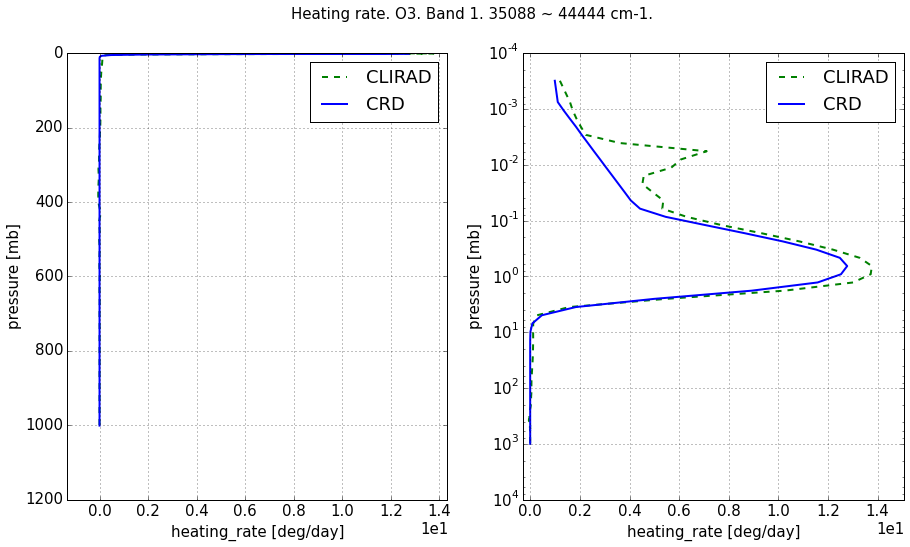


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 2. 33333 ~ 35088 44444 ~ 57142 cm-1

CLIRAD
       pressure       flux_up     flux_down      net_flux  heating_rate
70     0.002417 -1.032698e-08  3.854295e+00  3.854295e+00  2.696806e-01
30   299.800000 -1.936461e-15  7.518447e-07  7.518447e-07  3.308352e-08
0   1013.000000 -0.000000e+00  1.469211e-07  1.469211e-07  1.450133e-09

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   3.854297  3.854297      0.302065
30   299.800000        0   0.001474  0.001474      0.000019
0   1013.000000        0   0.001007  0.001007      0.000002

CLIRAD - CRD
    pressure       flux_up  flux_down  net_flux  heating_rate
70         0 -1.032698e-08  -0.000002 -0.000002     -0.032384
30         0 -1.936461e-15  -0.001473 -0.001473     -0.000019
0          0 -0.000000e+00  -0.001007 -0.001007     -0.000002



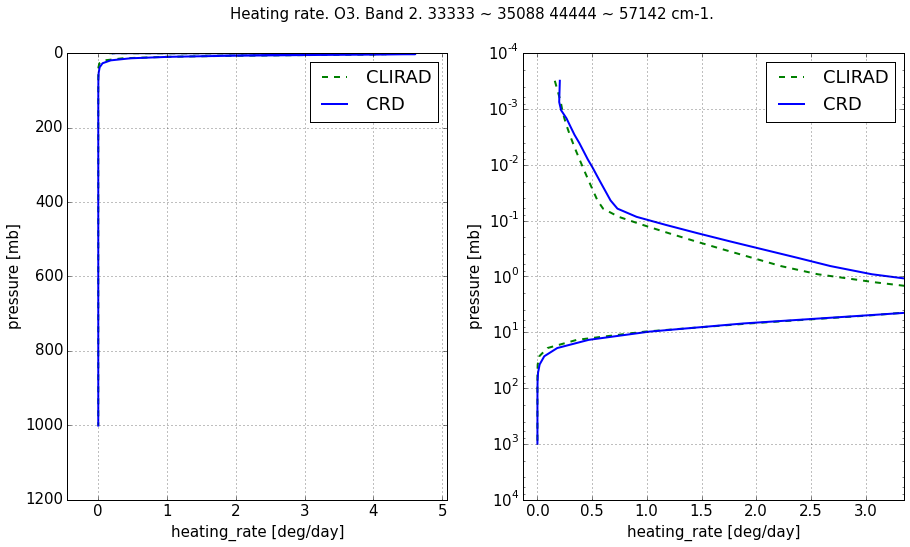


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 3. 30770 ~ 33333 cm-1

CLIRAD
       pressure       flux_up  flux_down  net_flux  heating_rate
70     0.002417 -1.943932e-08   7.937303  7.937303      0.045849
30   299.800000 -1.368139e-09   2.509433  2.509433      0.008260
0   1013.000000 -0.000000e+00   2.221919  2.221919      0.001719

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   7.937303  7.937303      0.052225
30   299.800000        0   3.245764  3.245764      0.005843
0   1013.000000        0   3.050491  3.050491      0.001228

CLIRAD - CRD
    pressure       flux_up     flux_down      net_flux  heating_rate
70         0 -1.943932e-08  3.667632e-07  3.473239e-07     -0.006377
30         0 -1.368139e-09 -7.363309e-01 -7.363309e-01      0.002417
0          0 -0.000000e+00 -8.285720e-01 -8.285720e-01      0.000490



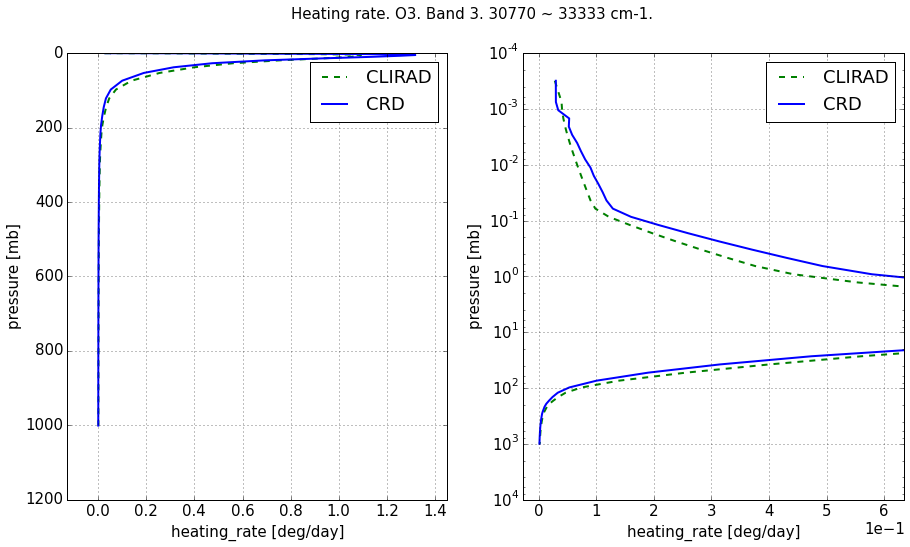


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 4. 25000 ~ 30770 cm-1

CLIRAD
       pressure       flux_up  flux_down   net_flux  heating_rate
70     0.002417 -4.109438e-09  37.994446  37.994446      0.013757
30   299.800000 -3.921970e-10  37.243437  37.243437      0.002331
0   1013.000000 -0.000000e+00  37.164929  37.164929      0.000549

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  37.994446  37.994446      0.002900
30   299.800000        0  37.517822  37.517822      0.001359
0   1013.000000        0  37.469792  37.469792      0.000318

CLIRAD - CRD
    pressure       flux_up     flux_down      net_flux  heating_rate
70         0 -4.109438e-09  3.500000e-07  3.458906e-07      0.010857
30         0 -3.921970e-10 -2.743851e-01 -2.743851e-01      0.000972
0          0 -0.000000e+00 -3.048629e-01 -3.048629e-01      0.000231



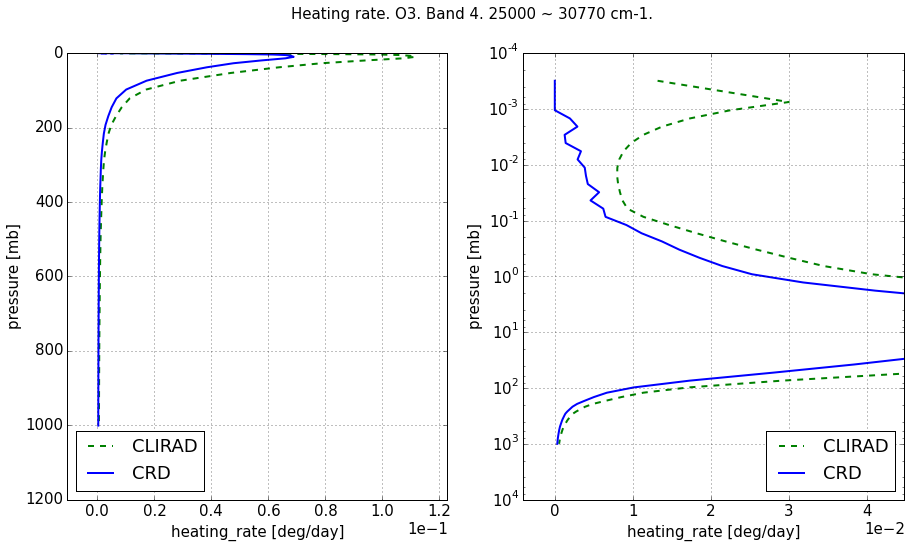


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 5. 14286 ~ 25000 cm-1

CLIRAD
       pressure       flux_up   flux_down    net_flux  heating_rate
70     0.002417 -4.689972e-08  265.032088  265.032088      0.109613
30   299.800000 -4.470463e-09  256.403182  256.403182      0.025485
0   1013.000000 -0.000000e+00  255.507836  255.507836      0.005990

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  265.032088  265.032088      0.000000
30   299.800000        0  256.760781  256.760781      0.023995
0   1013.000000        0  255.911333  255.911333      0.005630

CLIRAD - CRD
    pressure       flux_up  flux_down      net_flux  heating_rate
70         0 -4.689972e-08   0.000000 -4.689969e-08      0.109613
30         0 -4.470463e-09  -0.357599 -3.575991e-01      0.001490
0          0 -0.000000e+00  -0.403497 -4.034965e-01      0.000360



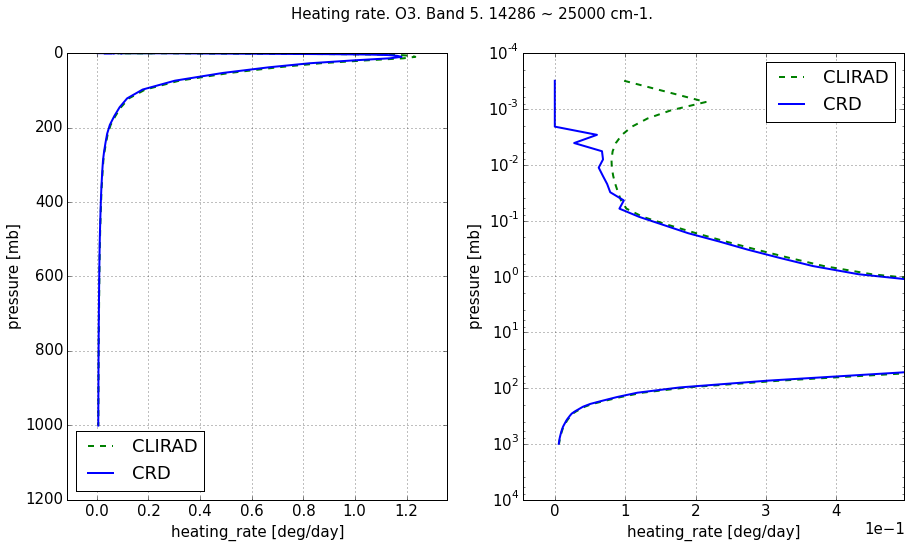


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 6. 8200 ~ 14280 cm-1

CLIRAD
       pressure   flux_up   flux_down    net_flux  heating_rate
70     0.002417 -0.000155  220.865316  220.865161      0.482214
30   299.800000 -0.000066  220.863604  220.863537      0.000014
0   1013.000000 -0.000000  220.862294  220.862294      0.000014

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  220.865517  220.865517      0.000000
30   299.800000        0  220.062330  220.062330      0.002389
0   1013.000000        0  219.977669  219.977669      0.000568

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  heating_rate
70         0 -0.000155  -0.000201 -0.000356      0.482214
30         0 -0.000066   0.801274  0.801208     -0.002375
0          0 -0.000000   0.884625  0.884625     -0.000554



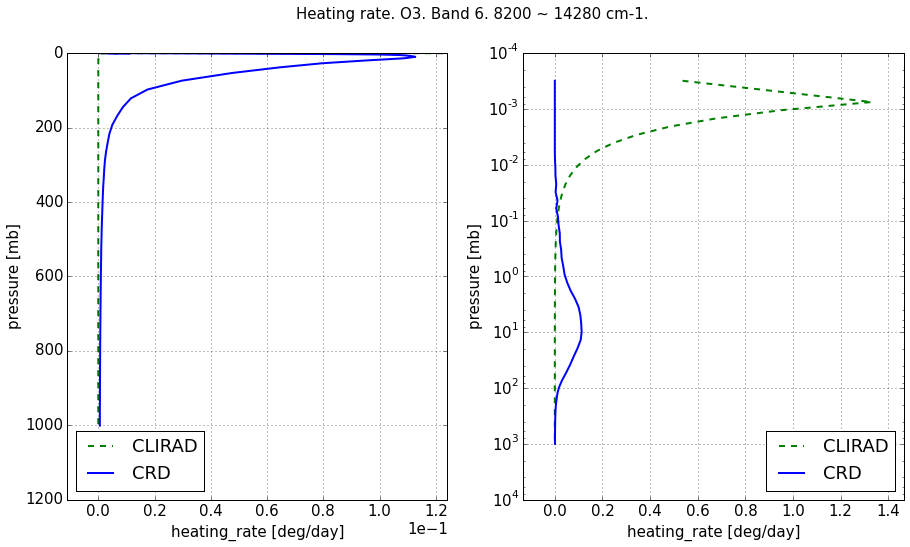


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 7. 4400 ~ 8200 cm-1

CLIRAD
       pressure   flux_up   flux_down    net_flux  heating_rate
70     0.002417 -0.000080  113.874410  113.874331      0.275643
30   299.800000 -0.000034  113.873505  113.873470      0.000008
0   1013.000000 -0.000000  113.872699  113.872699      0.000008

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  113.874511  113.874511      0.000000
30   299.800000        0  113.599103  113.599103      0.000821
0   1013.000000        0  113.570006  113.570006      0.000195

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  heating_rate
70         0 -0.000080  -0.000101 -0.000180      0.275643
30         0 -0.000034   0.274402  0.274368     -0.000813
0          0 -0.000000   0.302693  0.302693     -0.000187



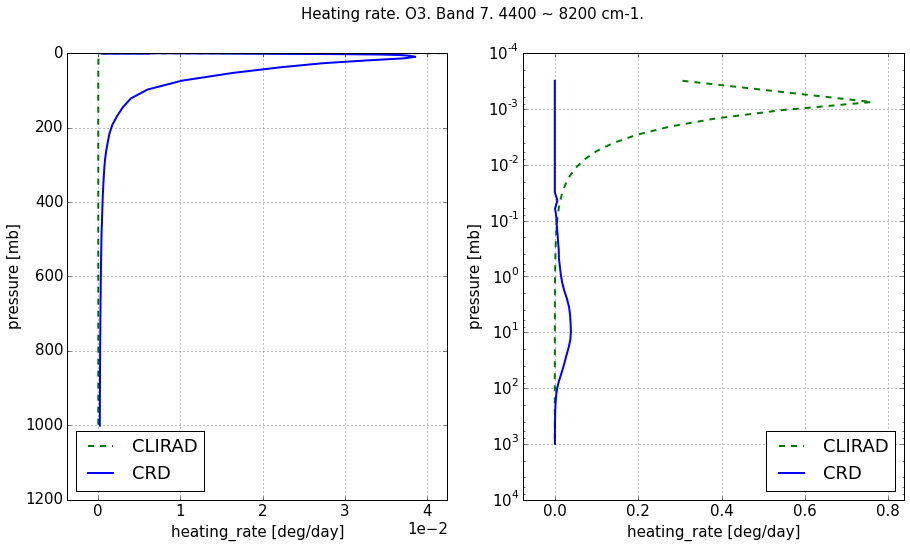


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 8. 1000 ~ 4400 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  heating_rate
70     0.002417 -0.000021  29.352214  29.352193      0.099332
30   299.800000 -0.000009  29.351877  29.351868      0.000003
0   1013.000000 -0.000000  29.351620  29.351620      0.000003

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  29.352253  29.352253      0.000000
30   299.800000        0  29.278332  29.278332      0.000219
0   1013.000000        0  29.270523  29.270523      0.000051

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  heating_rate
70         0 -0.000021  -0.000040 -0.000060      0.099332
30         0 -0.000009   0.073545  0.073536     -0.000216
0          0 -0.000000   0.081097  0.081097     -0.000048



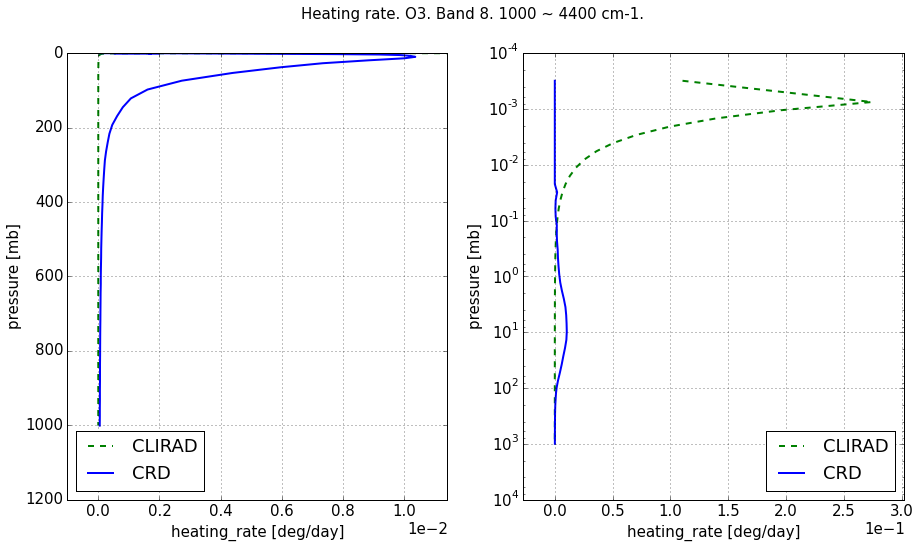


------------------------------------------------------------------------



In [11]:
print('Flux tables and heating rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.sw_results_by_clirad_bands(
    infos_clirad=[('CLIRAD', 'g', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd),],
    name_molecule=name_molecule)

In [12]:
html_download = ('<a href='
                 '"./shortwave_mls_{name_molecule}_by_clirad_bands.xlsx"'
                 'download>'
                 'shortwave_mls_{name_molecule}_by_clirad_bands.xlsx'
                 '</a>')
display.HTML(html_download.format(name_molecule=name_molecule))

In [13]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')